## Berke Türk
## Tunahan Burak Birlik

*****

## Question 1

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd  # berke, 1. çözüm

def transition_matrix(n):
    tm = np.zeros((n,n))
    tm[np.arange(1,n),np.arange(0,n-1)] = 0.6
    tm[np.arange(0,n-1),np.arange(1,n)] = 0.3
    tm[0,:n-1] = 0.1
    tm[0,:2] = 0.4 
    tm[n-1,n-1] = 1
    tm[n-2,n-1] = 0 
    return tm   

In [29]:
transition_matrix(10)

array([[0.4, 0.4, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. ],
       [0.6, 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.6, 0. , 0.3, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.6, 0. , 0.3, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.6, 0. , 0.3, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.3, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.3, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 1. ]])

In [30]:
import numpy as np # burak 2. çözüm, yukardakinin alternatifi
import matplotlib.pyplot as plt

def transition_matrix(n):

    matrix1 = np.eye(n, n, k = -1)*0.6
    matrix2 = np.eye(n, n, k=1) *0.3
    matrix2[0, :n-1 ] =0.1
    matrix2[0, :2] = 0.4
    matrix2[n-2][n-1] = 0
    matrix2[n - 1][n - 1] = 1
    return matrix1+matrix2
transition_matrix(10)

array([[0.4, 0.4, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. ],
       [0.6, 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.6, 0. , 0.3, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.6, 0. , 0.3, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.6, 0. , 0.3, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.3, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.3, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 1. ]])

## Question 2

In [31]:
def propagate(p0,k,tm):
    p = p0
    for i in range(k):
        p = tm @ p
    return p

def propagate2(n): #bu kısım ikinci çözüm olarak 
    return np.linalg.matrix_power(tm, k) @ p

In [32]:
tm = transition_matrix(10)
p0 = np.zeros(10)
p0[0] = 1
prop = propagate(p0,30,tm)
prop

array([0.16029774, 0.13006664, 0.10561269, 0.08547506, 0.06947427,
       0.05552321, 0.04450658, 0.03281234, 0.02049648, 0.29573499])

## Question 3 Part A

In [33]:
tm = transition_matrix(10)
p = np.zeros(10)
p[0] = 1
count = 0
while p[-1] < 0.5:
    p = tm @ p
    count += 1
count

50

## Question 3 Part B

In [34]:
def num_steps(n):
    tm = transition_matrix(n)
    p = np.zeros(n)
    p[0] = 1
    counter = 0
    while p[-1] < 0.5:
        p = tm @ p
        counter += 1
    return counter

In [35]:
num_steps(40)

77600

## Question 3 Part C

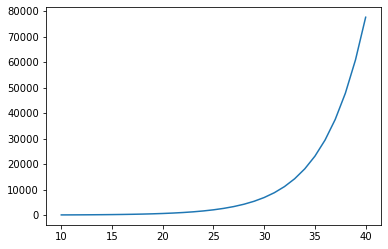

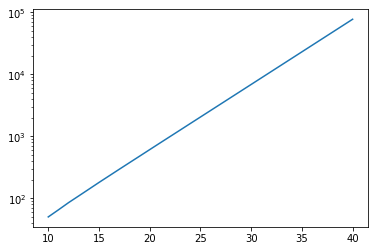

In [36]:
def plotNumStep(start, end):            # BERKE SOLUTION
    ns = [num_steps(n) for n in range(start, end+1)]
    plt.plot(range(start, end+1), ns)
    plt.savefig('qsn3c.png')
    plt.show()
    
    plt.semilogy(range(start, end+1), ns) 
    plt.savefig('qsn3c_semilogy.png')
    plt.show()
    
    #The matplotlib.pyplot.semilogy() function in pyplot module of matplotlib 
    #library is used to make a plot with log scaling on the y axis. semilogy nin özelliği y ekseninde 
    #10 un katları şeklinde gösterim yapması (üstel fonks.)
    
plotNumStep(10, 40)

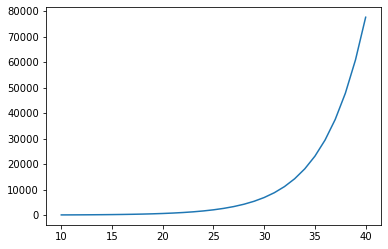

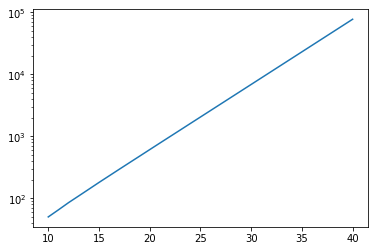

In [37]:
def plotNumStep2(start, end ): #BURAK SOLUTION, alternatif aynı soru çözüm

    stepList = []
    nRange = np.arange(start,end+1,1)

    for n in range (start, end+1):
        stepList.append ( num_steps(n) )

    plt.plot(nRange, stepList)
    plt.savefig('qsn3c.png')
    plt.show()

    plt.semilogy(nRange, stepList)
    plt.savefig('qsn3c_semilogy.png')
    plt.show()
plotNumStep2(10,40)

## Question 4 Part A

In [38]:
import numpy.random as rnd  # berke 
import numpy as np 
tm = transition_matrix(10)

def sample(tm, s0):
    
    stateList = np.arange(0,len(tm), 1)
    nextState = np.random.choice(stateList, 1, p=tm[:,s0]) 
                                                                                                                                                                             
    return nextState[0]

In [39]:
sample(tm,4) 

3

In [40]:
import numpy as np          # burak alternatif çözüm      
tm = transition_matrix(10)

def sample (tm,s0):
    
    stateList = np.arange(0,len(tm), 1)
    ratioList = []
    for i in range (0, len(tm)):
        ratioList.append( tm [i][s0] )
    
    nextState = np.random.choice(stateList, 1, p=ratioList)
        
    return nextState[0]

In [41]:
sample(tm,5) 

0

## Question 4 Part B

In [42]:
import numpy.random as rnd  #berke
import numpy as np     
tm = transition_matrix(10)

def sample_k_steps(tm,k,s0):  
    s = s0
    states = [s]
    for i in range(k):
        s = np.random.choice(tm.shape[0], p=tm[:,s])
        states.append(s)
    return states

In [43]:
sample_k_steps(tm,25,0)

[0, 1, 2, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1]

In [44]:
import numpy as np     
tm = transition_matrix(10)        #burak  alternatif çözüm

def sample_k_steps(tm,k,s0):
    
    path = []
    nextState = 0 
    currentState = s0
    path.append(currentState)
    
    for i in range (k):
        nextState = sample (tm,currentState)
        path.append(nextState)
        currentState, nextState = nextState, currentState 
        
    return path

sample_k_steps(tm,25,0)

[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 3, 4, 3, 2, 1, 0, 1, 0, 1, 2, 1]

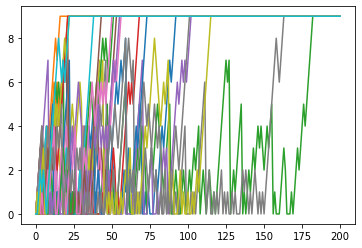

In [45]:
#TESTING
tm = transition_matrix(10)
k = 200
s0 = 0

for i in range(20):
    states = sample_k_steps(tm, k, s0)
    plt.plot(states)

plt.savefig("qsn4b.png")

## Question 5


In [46]:
def hitting_time_1_walk(tm,i,j):
    
    path = []
    nextState = 0  
    currentState = i
    path.append(currentState)
    
    while (currentState != j):
        nextState = sample (tm,currentState)
        path.append(nextState)
        currentState, nextState = nextState, currentState 
      
    return len(path)-1

In [47]:
tm = transition_matrix(20)
arr = []
for i in range(1000):
    arr.append(hitting_time_1_walk(tm,0,len(tm)-1))

In [53]:
print (arr,end=" " )

[1253, 344, 1112, 36, 1615, 1056, 581, 2190, 753, 863, 756, 191, 295, 673, 826, 190, 1239, 775, 101, 96, 394, 1212, 534, 1183, 159, 1053, 261, 2110, 1054, 122, 120, 1374, 284, 589, 913, 863, 65, 227, 428, 1749, 244, 39, 296, 2491, 498, 45, 1258, 405, 243, 712, 1272, 582, 645, 980, 330, 1088, 465, 41, 1319, 269, 112, 481, 1038, 143, 1177, 2500, 1649, 235, 3051, 639, 1262, 470, 386, 689, 199, 585, 1512, 1176, 257, 670, 368, 34, 303, 881, 387, 2224, 158, 113, 1510, 205, 200, 821, 259, 805, 2354, 571, 327, 1241, 795, 1080, 1043, 166, 935, 924, 1175, 1078, 737, 667, 673, 456, 218, 1366, 66, 1105, 1006, 1017, 303, 113, 242, 103, 706, 320, 176, 1173, 1627, 805, 657, 284, 629, 298, 67, 2814, 331, 777, 2657, 4551, 583, 2338, 1283, 664, 37, 2903, 789, 746, 1379, 77, 733, 576, 339, 1370, 180, 401, 51, 297, 214, 560, 1616, 2018, 824, 420, 872, 1394, 1398, 1737, 765, 519, 920, 169, 893, 63, 3295, 3294, 1792, 902, 1290, 1067, 864, 277, 171, 223, 1644, 200, 243, 166, 1766, 548, 349, 2019, 73, 1245, 9

In [49]:
def proportion_at_most(arr, max_value):
    
    ratioList = []
    maxStepList= []
    step_smaller_max_value = []
   
    for i in range(len(arr)):
        if (arr[i]<=max_value):
            maxStepList.append(arr[i])
    
    counter = 0
    
    for i in range(0, max_value+1):
        for j in range(len(maxStepList)):
            if (maxStepList[j]<=i):
                counter = counter + 1 
        step_smaller_max_value.append(counter)
        counter = 0

    
    for i in range (len(step_smaller_max_value)):
        ratio = step_smaller_max_value[i]/ len(maxStepList)
        ratioList.append(ratio)
        
    return ratioList

In [50]:
proportion_at_most(arr=[1,2,4,2,6], max_value = 7)

[0.0, 0.2, 0.6, 0.6, 0.8, 0.8, 1.0, 1.0]

In [54]:
print(proportion_at_most(arr, 2000),end=" ")

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010964912280701754, 0.0010964912280701754, 0.0021929824561403508, 0.0043859649122807015, 0.005482456140350877, 0.007675438596491228, 0.007675438596491228, 0.008771929824561403, 0.008771929824561403, 0.009868421052631578, 0.010964912280701754, 0.010964912280701754, 0.01425438596491228, 0.015350877192982455, 0.015350877192982455, 0.01644736842105263, 0.017543859649122806, 0.019736842105263157, 0.019736842105263157, 0.019736842105263157, 0.019736842105263157, 0.021929824561403508, 0.021929824561403508, 0.021929824561403508, 0.021929824561403508, 0.023026315789473683, 0.02412280701754386, 0.02631578947368421, 0.027412280701754384, 0.027412280701754384, 0.029605263157894735, 0.029605263157894735, 0.03179824561403509, 0.03289473684210526, 0.03618421052631579, 0.03618421052631579, 0.039473684210526314, 0.039473684210526314, 0.039473684210526314, 0.04057017543859649, 0.04

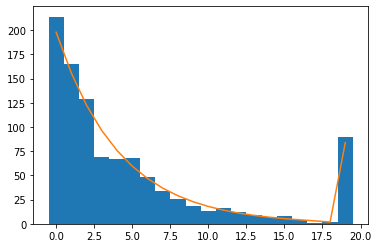

<Figure size 432x288 with 0 Axes>

In [52]:
n_steps = 100
tm = transition_matrix(20)

states = []
for i in range(1000):
    states.append(sample_k_steps(tm, n_steps, s0=0)[-1])
plt.hist(states, bins=np.arange(20+1)-0.5)

p0 = np.zeros(20)
p0[0] = 1
prob = propagate(p0, n_steps, tm)

plt.plot(prob * 1000)
plt.show()
plt.savefig("qsn5.png")